In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#df_ny = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/airbnb_property/New York-New York_Property_2017-03-01.csv')

df_ny = pd.read_csv('/content/drive/MyDrive/Hackathon/New York-New York_Property_2017-03-01.csv')

df_Texas_Austin = pd.read_csv('/content/drive/MyDrive/Hackathon/Texas-Austin_Property_2017-03-01.csv')



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (40) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_ny.count()

Property ID                      86008
Host ID                          86008
Listing Title                    86007
Property Type                    86006
Listing Type                     86008
Created Date                     86008
Last Scraped Date                86008
Country                          86008
State                            86008
City                             86008
Zipcode                          86008
Neighborhood                     85856
Metropolitan Statistical Area    86008
Average Daily Rate               63392
Annual Revenue LTM               86008
Occupancy Rate LTM               63392
Number of Bookings LTM           86008
Number of Reviews                86008
Overall Rating                   56122
Bedrooms                         85890
Bathrooms                        85690
Max Guests                       86008
Calendar Last Updated            84185
Response Rate                    49419
Response Time (min)              61566
Superhost                

In [ ]:
len(df_ny.dropna(subset=['Host ID', 'Occupancy Rate LTM']))

63392

In [ ]:
df_ny[df_ny['State'] == 'New Jersey'].isnull

<bound method DataFrame.isnull of        Property ID     Host ID                       Listing Title  \
29748    7457053.0  37630044.0                            Varodney   
32421    8011741.0  17594011.0               Heart of NYC in 20min   
34079    8405819.0  31970277.0       Amazing 2Bdr APT NYC BOOK NOW   
34522    8502901.0  34267221.0  Jean Claude&#39;s Damn Van/ Gloria   
41126    9684841.0   7471914.0                 West Village Wonder   

      Property Type     Listing Type Created Date Last Scraped Date  \
29748         House  Entire home/apt   2015-07-18        2016-10-13   
32421     Apartment  Entire home/apt   2015-08-21        2016-10-04   
34079     Apartment  Entire home/apt   2015-09-15        2016-12-06   
34522     Camper/RV  Entire home/apt   2015-09-20        2016-02-01   
41126     Apartment  Entire home/apt   2015-11-26        2016-10-11   

             Country       State      City  ...  Count Reservation Days LTM  \
29748  United States  New Jersey  New Y

In [ ]:
temp =df_ny[df_ny['State']!='New York']
df_ny[df_ny['State']!='New York'].isna().sum()
temp[temp['Average Daily Rate'].isna()]
# some houses where the state does not match the city have no reservation

,Property ID,Host ID,Listing Title,Property Type,Listing Type,Created Date,Last Scraped Date,Country,State,City,...,Count Reservation Days LTM,Count Available Days LTM,Count Blocked Days LTM,Number of Photos,Business Ready,Instantbook Enabled,Listing URL,Listing Main Image URL,Latitude,Longitude
29748,7457053.0,37630044.0,Varodney,House,Entire home/apt,2015-07-18,2016-10-13,United States,New Jersey,New York,...,0.0,122.0,1.0,12.0,False,Yes,https://www.airbnb.com/rooms/7457053,https://a2.muscache.com/im/pictures/94555299/1...,40.713860,-74.005007
32421,8011741.0,17594011.0,Heart of NYC in 20min,Apartment,Entire home/apt,2015-08-21,2016-10-04,United States,New Jersey,New York,...,0.0,366.0,0.0,17.0,False,No,https://www.airbnb.com/rooms/8011741,https://a2.muscache.com/im/pictures/27011da8-8...,40.756477,-73.985286
34457,8488439.0,42869937.0,FurnishedQueen-bed Studio Manhattan,Bed &amp; Breakfast,Entire home/apt,2015-09-20,2016-04-25,United States,Illinois,New York,...,0.0,112.0,254.0,5.0,True,No,https://www.airbnb.com/rooms/8488439,https://a2.muscache.com/im/pictures/49d84989-d...,40.750270,-73.985426
34522,8502901.0,34267221.0,Jean Claude&#39;s Damn Van/ Gloria,Camper/RV,Entire home/apt,2015-09-20,2016-02-01,United States,New Jersey,New York,...,0.0,366.0,0.0,8.0,False,No,https://www.airbnb.com/rooms/8502901,https://a0.muscache.com/im/pictures/108072769/...,40.762640,-73.982770
86008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_ny.dtypes

Property ID                      float64
Host ID                          float64
Listing Title                     object
Property Type                     object
Listing Type                      object
Created Date                      object
Last Scraped Date                 object
Country                           object
State                             object
City                              object
Zipcode                          float64
Neighborhood                      object
Metropolitan Statistical Area     object
Average Daily Rate               float64
Annual Revenue LTM               float64
Occupancy Rate LTM               float64
Number of Bookings LTM           float64
Number of Reviews                float64
Overall Rating                   float64
Bedrooms                         float64
Bathrooms                        float64
Max Guests                       float64
Calendar Last Updated             object
Response Rate                    float64
Response Time (m

In [ ]:
df_ny.isna().sum()

Property ID                          1
Host ID                              1
Listing Title                        2
Property Type                        3
Listing Type                         1
Created Date                         1
Last Scraped Date                    1
Country                              1
State                                1
City                                 1
Zipcode                              1
Neighborhood                       153
Metropolitan Statistical Area        1
Average Daily Rate               22617
Annual Revenue LTM                   1
Occupancy Rate LTM               22617
Number of Bookings LTM               1
Number of Reviews                    1
Overall Rating                   29887
Bedrooms                           119
Bathrooms                          319
Max Guests                           1
Calendar Last Updated             1824
Response Rate                    36590
Response Time (min)              24443
Superhost                

**Looking into number of houses booked variable**

In [ ]:
#number of bookings that are 0.
df_ny['Number of Bookings LTM'].value_counts()

0.0      22833
1.0      10895
2.0       7004
3.0       4916
4.0       3853
         ...  
139.0        1
184.0        1
149.0        1
194.0        1
147.0        1
Name: Number of Bookings LTM, Length: 154, dtype: int64

In [ ]:
df_ny['Property ID'].value_counts().sort_values(ascending = False)

105.0         1
5178.0        1
2534.0        1
2539.0        1
2595.0        1
             ..
16905634.0    1
16908288.0    1
16909197.0    1
16896749.0    1
16909522.0    1
Name: Property ID, Length: 86008, dtype: int64

In [ ]:
df_ny.groupby(by=['Number of Bookings LTM','Property ID'],as_index=False).mean()

,Number of Bookings LTM,Property ID,Host ID,Zipcode,Average Daily Rate,Annual Revenue LTM,Occupancy Rate LTM,Number of Reviews,Overall Rating,Bedrooms,...,Published Nightly Rate,Published Monthly Rate,Published Weekly Rate,Minimum Stay,Count Reservation Days LTM,Count Available Days LTM,Count Blocked Days LTM,Number of Photos,Latitude,Longitude
0,0.0,105.0,500.0,10036.0,NaN,0.0,NaN,39.0,4.8,1.0,...,549.0,15000.0,5000.0,1.0,0.0,366.0,0.0,25.0,40.762099,-73.996022
1,0.0,795.0,1061.0,10011.0,NaN,0.0,NaN,0.0,NaN,3.0,...,300.0,8400.0,2100.0,1.0,0.0,366.0,0.0,22.0,40.746257,-74.007022
2,0.0,5435.0,7987.0,10025.0,NaN,0.0,NaN,25.0,4.5,1.0,...,145.0,2300.0,1015.0,7.0,0.0,270.0,96.0,9.0,40.801550,-73.970001
3,0.0,5586.0,8526.0,10065.0,NaN,0.0,NaN,35.0,4.8,NaN,...,200.0,5600.0,1400.0,3.0,0.0,1.0,182.0,9.0,40.761198,-73.960633
4,0.0,6090.0,11975.0,10014.0,NaN,0.0,NaN,16.0,4.8,1.0,...,270.0,3600.0,1225.0,30.0,0.0,141.0,41.0,33.0,40.735932,-74.003773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86003,185.0,8033609.0,33213436.0,11217.0,129.86,41815.0,0.890,80.0,4.3,0.0,...,119.0,3332.0,833.0,1.0,322.0,40.0,4.0,4.0,40.678724,-73.982862
86004,189.0,11182867.0,58209252.0,10035.0,116.13,34026.0,0.907,1.0,NaN,1.0,...,129.0,3612.0,903.0,1.0,293.0,30.0,43.0,3.0,40.808262,-73.938359
86005,194.0,467634.0,2321321.0,11434.0,45.46,11546.0,0.694,303.0,4.6,1.0,...,39.0,1092.0,295.0,1.0,254.0,112.0,0.0,17.0,40.677467,-73.764932
86006,222.0,10101135.0,47621202.0,11434.0,43.59,13468.0,0.951,204.0,4.8,1.0,...,47.0,1316.0,329.0,1.0,309.0,16.0,41.0,11.0,40.669393,-73.769752


**Mapping booking rate of Business Ready homes **

In [ ]:
pd.to_datetime(df_ny2['Created Date']).apply
df_ny2['year listed'] = pd.DatetimeIndex(df_ny2['Created Date']).year

df_Texas_Austin['year listed'] = pd.DatetimeIndex(df_Texas_Austin['Created Date']).year

df_ny2

,Property ID,Host ID,Listing Title,Property Type,Listing Type,Created Date,Last Scraped Date,Country,State,City,...,Count Blocked Days LTM,Number of Photos,Business Ready,Instantbook Enabled,Listing URL,Listing Main Image URL,Latitude,Longitude,Unit number,year listed
0,105.0,500.0,Trendy Times Square Loft,Apartment,Private room,2008-06-28,2016-03-18,United States,New York,New York,...,0.0,25.0,False,No,https://www.airbnb.com/rooms/105,https://a0.muscache.com/im/pictures/59366/b695...,40.762099,-73.996022,1,2008
1,795.0,1061.0,Sky Chelsea 3 bdr,Apartment,Entire home/apt,2008-07-25,2016-03-02,United States,New York,New York,...,0.0,22.0,False,No,https://www.airbnb.com/rooms/795,https://a2.muscache.com/im/pictures/a849796f-a...,40.746257,-74.007022,1,2008
2,2515.0,2758.0,Stay at Chez Chic budget room #1,Apartment,Private room,2008-09-05,2017-03-01,United States,New York,New York,...,21.0,11.0,False,No,https://www.airbnb.com/rooms/2515,https://a0.muscache.com/im/pictures/88569/eebe...,40.799205,-73.953676,3,2008
3,8225.0,2758.0,Stay at Chez Chic budget Room #2,Apartment,Private room,2009-06-28,2017-03-01,United States,New York,New York,...,16.0,23.0,False,No,https://www.airbnb.com/rooms/8225,https://a0.muscache.com/im/pictures/4669165/16...,40.799034,-73.954063,3,2009
4,385853.0,2758.0,Central Park Artsy Guest Room,Apartment,Private room,2012-03-14,2017-02-27,United States,New York,New York,...,9.0,16.0,False,No,https://www.airbnb.com/rooms/385853,https://a0.muscache.com/im/pictures/53400604/1...,40.799494,-73.954736,3,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86003,16898115.0,112769024.0,Room in Bushwick loft 1 block from L Train!,Loft,Private room,2017-01-23,2017-02-28,United States,New York,New York,...,9.0,13.0,False,No,https://www.airbnb.com/rooms/16898115,https://a0.muscache.com/im/pictures/443c4c2e-d...,40.693020,-73.906528,1,2017
86004,16898547.0,40075720.0,Huge room in Bushwick w/ backyard,Apartment,Private room,2017-01-23,2017-02-28,United States,New York,New York,...,8.0,6.0,False,No,https://www.airbnb.com/rooms/16898547,https://a0.muscache.com/im/pictures/0eb90fea-0...,40.699796,-73.925686,1,2017
86005,16898596.0,30365278.0,"Large, Sunny Room in East Village",Apartment,Private room,2017-01-23,2017-01-23,United States,New York,New York,...,10.0,7.0,False,Yes,https://www.airbnb.com/rooms/16898596,https://a0.muscache.com/im/pictures/61994752-a...,40.725966,-73.988858,1,2017
86006,16899285.0,4507242.0,~ Luxurious Bedroom in the heart of NYC ~,Apartment,Private room,2017-01-23,2017-03-01,United States,New York,New York,...,8.0,15.0,False,No,https://www.airbnb.com/rooms/16899285,https://a0.muscache.com/im/pictures/38024a8c-a...,40.763524,-73.993082,1,2017


In [ ]:
counts=df_ny.groupby(by=['Host ID'])['Property ID'].count().reset_index(name='Unit number').sort_values(['Unit number'],ascending=False)
count = df_Texas_Austin.groupby(by=['Host ID'])['Property ID'].count().reset_index(name='Unit number').sort_values(['Unit number'],ascending=False)


In [ ]:
df_ny2=df_ny2.merge(counts)
df_ny2.sort_values(['Unit number'],ascending=False)

df_au = df_Texas_Austin.merge(count)
df_au.sort_values(['Unit number'],ascending=False)


,Property ID,Host ID,Listing Title,Property Type,Listing Type,Created Date,Last Scraped Date,Country,State,City,...,Count Blocked Days LTM,Number of Photos,Business Ready,Instantbook Enabled,Listing URL,Listing Main Image URL,Latitude,Longitude,year listed,Unit number
11851,12967562.0,69990687.0,South Congress Treehouse Studio - 1BR Home,Other,Entire home/apt,2016-05-11,2016-06-14,United States,Texas,Austin,...,16.0,24.0,False,Yes,https://www.airbnb.com/rooms/12967562,https://a2.muscache.com/im/pictures/2da4bb9f-c...,30.249161,-97.751989,2016.0,131
11848,12967730.0,69990687.0,Historic LBJ Mansion near Lake Austin with Poo...,Other,Entire home/apt,2016-05-11,2016-06-13,United States,Texas,Austin,...,35.0,24.0,False,Yes,https://www.airbnb.com/rooms/12967730,https://a2.muscache.com/im/pictures/774df5ae-5...,30.296379,-97.772856,2016.0,131
11830,12967762.0,69990687.0,Charming Remodeled Austin House - 3BR Home,Other,Entire home/apt,2016-05-11,2016-06-14,United States,Texas,Austin,...,13.0,24.0,False,Yes,https://www.airbnb.com/rooms/12967762,https://a2.muscache.com/im/pictures/fbe715bf-d...,30.304767,-97.749332,2016.0,131
11831,12967455.0,69990687.0,Contemporary Southwestern Style in Austin - 5B...,Other,Entire home/apt,2016-05-11,2016-06-14,United States,Texas,Austin,...,39.0,24.0,False,Yes,https://www.airbnb.com/rooms/12967455,https://a2.muscache.com/im/pictures/ed4a4712-f...,30.244477,-97.773385,2016.0,131
11832,12967558.0,69990687.0,"House, Fabulous Deck, Close to Zilker, Barton ...",Other,Entire home/apt,2016-05-11,2016-06-14,United States,Texas,Austin,...,19.0,24.0,False,Yes,https://www.airbnb.com/rooms/12967558,https://a2.muscache.com/im/pictures/2a6847db-2...,30.241985,-97.775897,2016.0,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8493,9231875.0,6423924.0,SXSW Downtown SoCo 2BR Skyline Views Free Park...,Apartment,Entire home/apt,2015-11-01,2017-03-01,United States,Texas,Austin,...,165.0,16.0,False,No,https://www.airbnb.com/rooms/9231875,https://a0.muscache.com/im/pictures/6fc0619b-2...,30.252297,-97.749359,2015.0,1
8494,9239771.0,11676267.0,North Campus - Hyde Park Apartment,Apartment,Private room,2015-11-01,2017-02-28,United States,Texas,Austin,...,268.0,4.0,False,No,https://www.airbnb.com/rooms/9239771,https://a0.muscache.com/im/pictures/f8d35044-a...,30.304058,-97.724749,2015.0,1
8495,9238743.0,24012955.0,Cozy house in North Austin,House,Private room,2015-11-01,2017-02-27,United States,Texas,Austin,...,0.0,6.0,False,No,https://www.airbnb.com/rooms/9238743,https://a0.muscache.com/im/pictures/7d44e130-a...,30.426167,-97.684259,2015.0,1
3021,2454131.0,12549104.0,2bed/2bath *4 MILES* from Downtown!,Apartment,Entire home/apt,2014-02-23,2017-02-28,United States,Texas,Austin,...,366.0,25.0,False,No,https://www.airbnb.com/rooms/2454131,https://a0.muscache.com/im/pictures/32673396/5...,30.234906,-97.787907,2014.0,1


           Neighborhood  year listed  counts
364        Williamsburg         2016     100
165              Harlem         2015      76
334     Upper East Side         2016      75
340     Upper West Side         2016      71
348  Washington Heights         2016      65
231             Midtown         2015      54
25             Brooklyn         2015      52
77        Crown Heights         2016      51
339     Upper West Side         2015      44
333     Upper East Side         2015      40


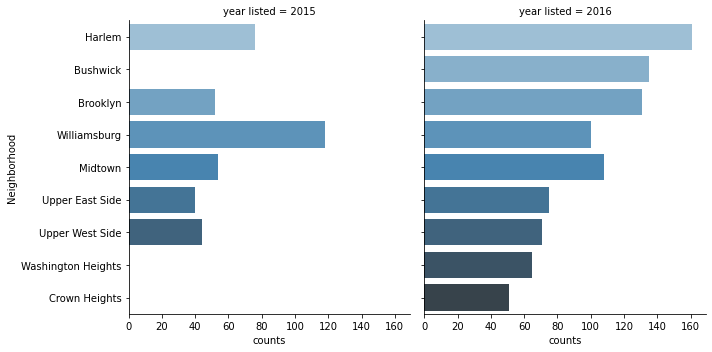

In [ ]:
#Shared room per host
df_nyshared = df_ny2[df_ny2['Listing Type']== 'Shared room']
#f##ig, axes = plt.subplots(2, 2)

df_nyshared = df_nyshared.groupby(by = ['Neighborhood', 'year listed'])['Property ID'].count().reset_index(name='counts').sort_values(['counts'], ascending = False).head(n=15)
print(df_nyshared.tail(n=10))

#sns.barplot(x="counts", y="Neighborhood", data=df_nyshared,
           #      palette="Blues_d")
sns.catplot(x="counts", y="Neighborhood", col="year listed", kind="bar", data=df_nyshared, palette="Blues_d")
#sns.catplot(x="counts", y="Neighborhood", col="year listed", kind="bar", data=df_nyshared, palette="Blues_d", ax=axes[0,1])

#df_private = df_ny2[df_ny2['Listing Type']== 'Private']
#df_nyshared.sort_values(['Unit number'],ascending=False)
#df_nyshared


In [ ]:
#g = sns.FacetGrid(df_nyshared, col=df_nyshared["year listed"])

#g.map(sns.barplot, x="counts", y="Neighborhood")

KeyError: ignored

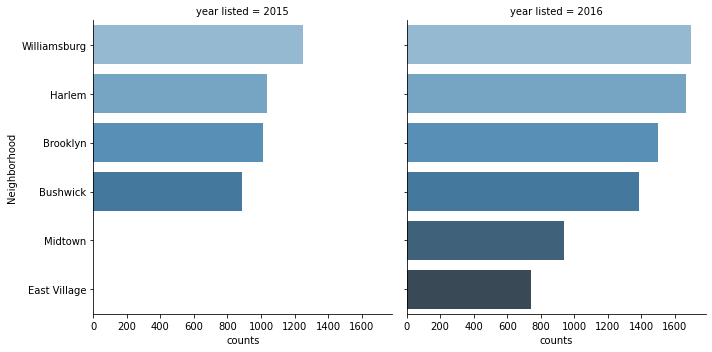

In [ ]:
#Private room per host
df_nyprivate=df_ny2[df_ny2['Listing Type']== 'Private room']
df_nyprivate = df_nyprivate.groupby(by = ['Neighborhood', 'year listed'])['Property ID'].count().reset_index(name='counts').sort_values(['counts'], ascending = False).head(n=10)


#df_nyprivate = df_nyprivate.groupby(by = ['Neighborhood'])['Property ID'].count().reset_index(name='counts').sort_values(['counts'], ascending = False).head(n=10)
sns.catplot(x="counts", y="Neighborhood", col="year listed", kind="bar", data=df_nyprivate, palette="Blues_d")



#df_nyprivate.sort_values(['Unit number'],ascending=False)
#df_nyprivate['Unit number'].value_counts()

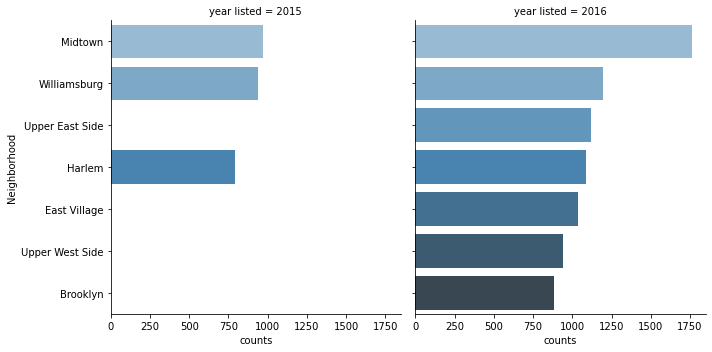

In [ ]:
#Entire home/apt per host
df_nyhome=df_ny2[df_ny2['Listing Type']== 'Entire home/apt']

#df_nyshared = df_nyshared.groupby(by = ['Neighborhood', 'year listed'])['Property ID'].count().reset_index(name='counts').sort_values(['counts'], ascending = False).head(n=10)

df_nyhome = df_nyhome.groupby(by = ['Neighborhood', 'year listed'])['Property ID'].count().reset_index(name='counts').sort_values(['counts'], ascending = False).head(n=10)
sns.catplot(x="counts", y="Neighborhood", col="year listed", kind="bar", data=df_nyhome, palette="Blues_d")


#df_nyhome['Unit number'].value_counts()

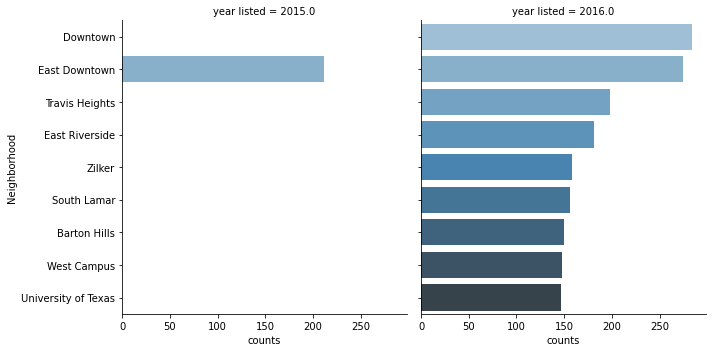

In [ ]:


df_auhome=df_au[df_au['Listing Type']== 'Entire home/apt']

df_auhome = df_auhome.groupby(by = ['Neighborhood', 'year listed'])['Property ID'].count().reset_index(name='counts').sort_values(['counts'], ascending = False).head(n=10)
sns.catplot(x="counts", y="Neighborhood", col="year listed", kind="bar", data=df_auhome, palette="Blues_d")

           Neighborhood  year listed  counts
166              Harlem         2016     161
39             Bushwick         2016     135
26             Brooklyn         2016     131
363        Williamsburg         2015     118
232             Midtown         2016     108
364        Williamsburg         2016     100
165              Harlem         2015      76
334     Upper East Side         2016      75
340     Upper West Side         2016      71
348  Washington Heights         2016      65


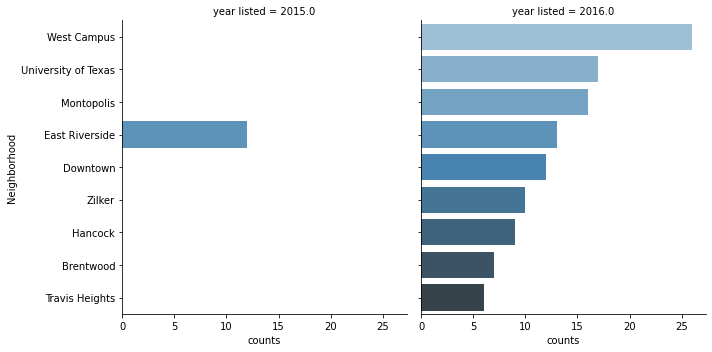

In [ ]:
df_aushared = df_au[df_au['Listing Type']== 'Shared room']

df_aushared = df_aushared.groupby(by = ['Neighborhood', 'year listed'])['Property ID'].count().reset_index(name='counts').sort_values(['counts'], ascending = False).head(n=10)
print(df_nyshared.tail(n=10))

sns.catplot(x="counts", y="Neighborhood", col="year listed", kind="bar", data=df_aushared, palette="Blues_d")

AttributeError: ignored

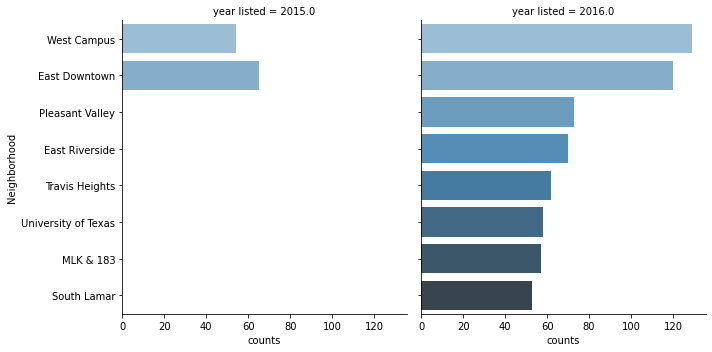

In [ ]:
df_auprivate=df_au[df_au['Listing Type']== 'Private room']
df_auprivate = df_auprivate.groupby(by = ['Neighborhood', 'year listed'])['Property ID'].count().reset_index(name='counts').sort_values(['counts'], ascending = False).head(n=10)
sns.catplot(x="counts", y="Neighborhood", col="year listed", kind="bar", data=df_auprivate, palette="Blues_d")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,Property ID,Host ID,Listing Title,Property Type,Listing Type,Created Date,Last Scraped Date,Country,State,City,...,Count Blocked Days LTM,Number of Photos,Business Ready,Instantbook Enabled,Listing URL,Listing Main Image URL,Latitude,Longitude,Unit number,year listed
35208,9165585.0,30283594.0,New York Lux Furnished 2BR Apt.,Apartment,Entire home/apt,2015-10-28,2016-02-19,United States,New York,New York,...,0.0,15.0,False,No,https://www.airbnb.com/rooms/9165585,https://a2.muscache.com/im/pictures/e2adc715-c...,40.760397,-73.988626,67,2015
35216,9860670.0,30283594.0,Deluxe Furnished 1BR Apt. in NY.,Apartment,Entire home/apt,2015-12-06,2016-02-19,United States,New York,New York,...,0.0,14.0,False,No,https://www.airbnb.com/rooms/9860670,https://a2.muscache.com/im/pictures/d2cf5784-a...,40.760642,-73.985539,67,2015
35205,9148197.0,30283594.0,Deluxe Furnished 1BR Aptartment,Apartment,Entire home/apt,2015-10-27,2016-02-19,United States,New York,New York,...,0.0,11.0,False,No,https://www.airbnb.com/rooms/9148197,https://a2.muscache.com/im/pictures/df2f0fa1-1...,40.760218,-73.987874,67,2015
35206,9164770.0,30283594.0,Deluxe Furnished NY 1BR Apt.,Apartment,Entire home/apt,2015-10-28,2016-02-19,United States,New York,New York,...,0.0,14.0,False,No,https://www.airbnb.com/rooms/9164770,https://a2.muscache.com/im/pictures/43af0be3-2...,40.762052,-73.986905,67,2015
35207,9165280.0,30283594.0,Lux Furnished 2BR NY Apt.,Apartment,Entire home/apt,2015-10-28,2016-02-19,United States,New York,New York,...,28.0,12.0,False,No,https://www.airbnb.com/rooms/9165280,https://a2.muscache.com/im/pictures/b1078c89-1...,40.761900,-73.986313,67,2015
35209,9166211.0,30283594.0,Luxury 2BR Furnished NY Apt.,Apartment,Entire home/apt,2015-10-28,2016-02-19,United States,New York,New York,...,0.0,15.0,False,No,https://www.airbnb.com/rooms/9166211,https://a2.muscache.com/im/pictures/f48107fe-c...,40.760783,-73.987932,67,2015
35210,9250196.0,30283594.0,Lux Furnished 1BR New York Apt.,Apartment,Entire home/apt,2015-11-02,2016-02-19,United States,New York,New York,...,0.0,21.0,False,No,https://www.airbnb.com/rooms/9250196,https://a2.muscache.com/im/pictures/16fbae5c-b...,40.760634,-73.985771,67,2015
35211,9251088.0,30283594.0,Deluxe Furnished 1BR Apt. in NY.,Apartment,Entire home/apt,2015-11-02,2016-02-19,United States,New York,New York,...,0.0,6.0,False,No,https://www.airbnb.com/rooms/9251088,https://a2.muscache.com/im/pictures/5b80585d-7...,40.758556,-73.982214,67,2015
35212,9254066.0,30283594.0,Luxurious 1BR New York Apt.,Apartment,Entire home/apt,2015-11-02,2016-02-19,United States,New York,New York,...,0.0,15.0,False,No,https://www.airbnb.com/rooms/9254066,https://a2.muscache.com/im/pictures/b7da3fa3-a...,40.759963,-73.985510,67,2015
35213,9855793.0,30283594.0,NYC Midtown West Luxury 2BR-Apt.,Apartment,Entire home/apt,2015-12-06,2016-02-25,United States,New York,New York,...,0.0,18.0,False,No,https://www.airbnb.com/rooms/9855793,https://a2.muscache.com/im/pictures/8e5c8684-c...,40.766914,-73.982233,67,2015


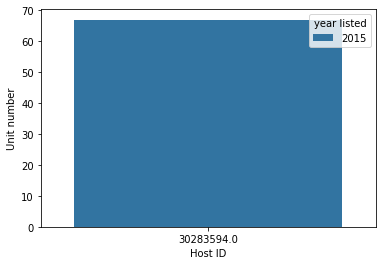

In [ ]:
top10_df_nyhome = df_nyhome.sort_values(['Unit number'], ascending=False).head(n=10)


y = top10_df_nyhome['Unit number']
z = top10_df_nyhome['year listed']
x = top10_df_nyhome['Host ID']

import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x, y, z)

top10_df_nyhome

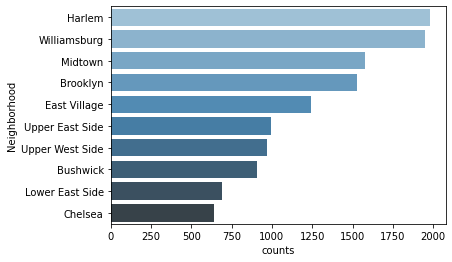

In [ ]:
dfny_plus10=df_ny2[df_ny2['Number of Bookings LTM'] >=10]
len(dfny_plus10)

25050/85999
#looking at 30% of the newyork data

dfny_plus10.isna().sum()
first = dfny_plus10.groupby(by = ['Neighborhood', 'Overall Rating'])["Published Nightly Rate"].mean().to_frame()
first.sort_values(["Overall Rating"], ascending = False, inplace=True)
#first.columns
sns.barplot()

### count number of houses that have 5 rating in a neighborhood
dfny_plus10_elite = dfny_plus10[dfny_plus10["Overall Rating"] > 4]
df = dfny_plus10_elite.groupby(by = ['Neighborhood'])['Property ID'].count().reset_index(name='counts').sort_values(['counts'], ascending = False).head(n=10)
df

ax = sns.barplot(x="counts", y="Neighborhood", data=df,
                 palette="Blues_d")
ax

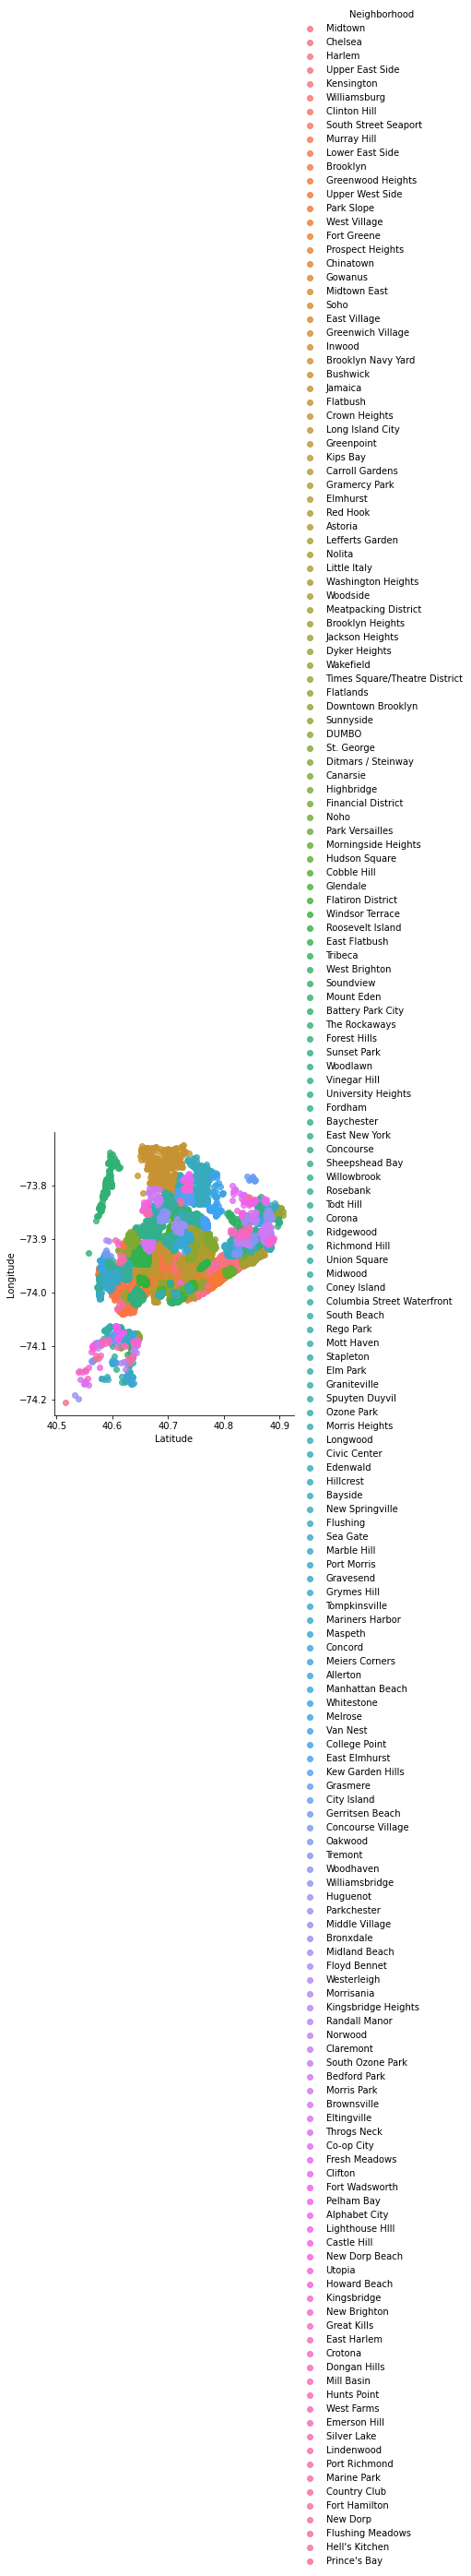

In [ ]:
sns.lmplot(data=df_ny, x= 'Latitude', y = 'Longitude', hue= 'Neighborhood', legend= True, fit_reg = False)